In [1]:
#READING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score



In [2]:
#READING DATASET

df = pd.read_csv('bank-full.csv', encoding='utf-8')
print(df.info())

#how many rows and features 
rows, features=df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [3]:

#PREPROCESSING

#drop columns that are not useful for analysis
drop_cols = ['contact','day','duration','pdays']

df = df.drop(columns=drop_cols, errors='ignore')  


#replace different types of missing values with NaN
df.replace(
    to_replace=["", " ", "NA", "null", "None", "N/A", "missing"],
    value=np.nan,
    inplace=True
)


#drop columns where target is null
target_col = 'y'  
df = df[df[target_col].notna()]

#make separate dataframes for features and target variable
df_features = df.drop(columns=[target_col])
df_target = df[target_col]


#splitting the columns of features dataset into numerical and categorical features

numerical_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object', 'category']).columns.tolist()


In [4]:
# SPLITING THE DATASET

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42,stratify=df_target)



In [ ]:
# setting up imputer to handle missing values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# handle missing values
if numerical_features:
    X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

if categorical_features:
    df_features[categorical_features] = categorical_imputer.fit_transform(df_features[categorical_features])


# Encoding categorical features using LabelEncoder (in-place)
if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Encoding target variable if categorical
if df_target.dtype == 'object' or str(df_target.dtype) == 'category':
    target_encoder = LabelEncoder()
    y_train_encoded = target_encoder.fit_transform(y_train.astype(str))
    y_test_encoded = target_encoder.transform(y_test.astype(str))

    y_train = pd.Series(y_train_encoded, name='y_train')
    y_test = pd.Series(y_test_encoded, name='y_test')

    inverse_mapping = {idx: label for idx, label in enumerate(target_encoder.classes_)}


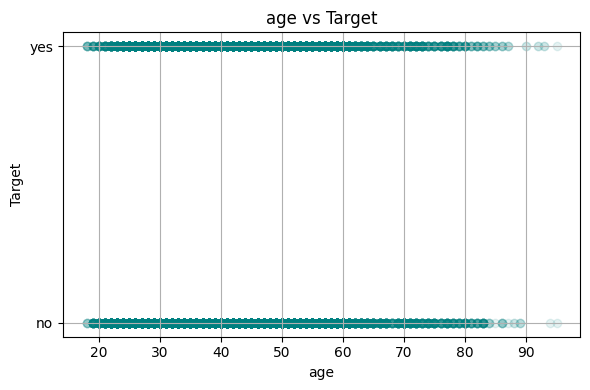

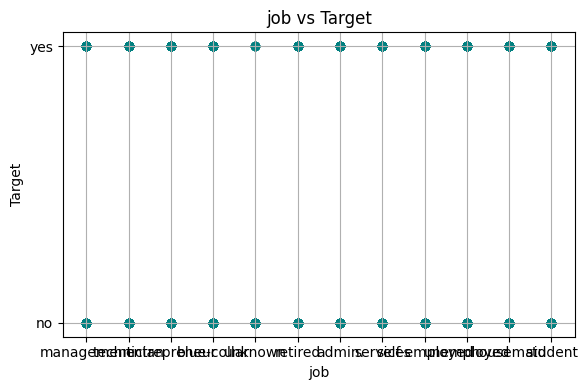

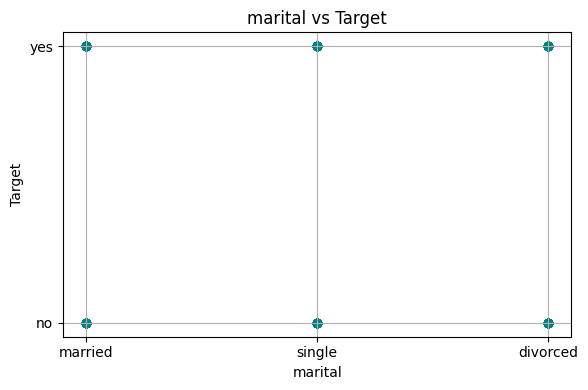

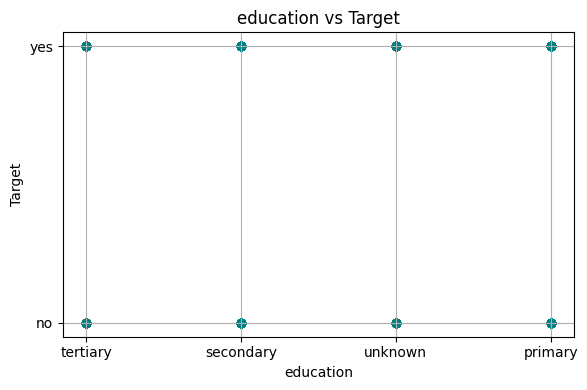

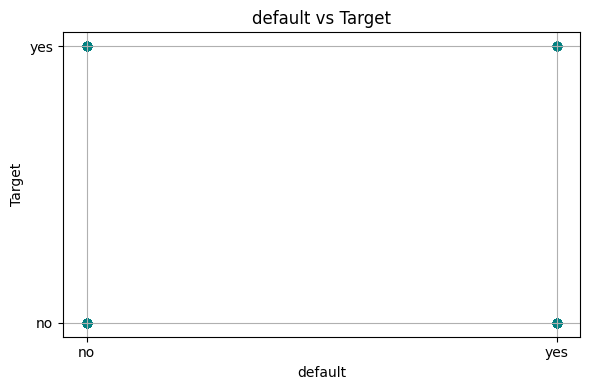

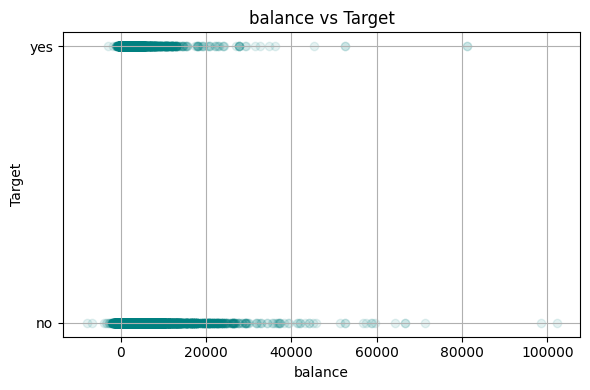

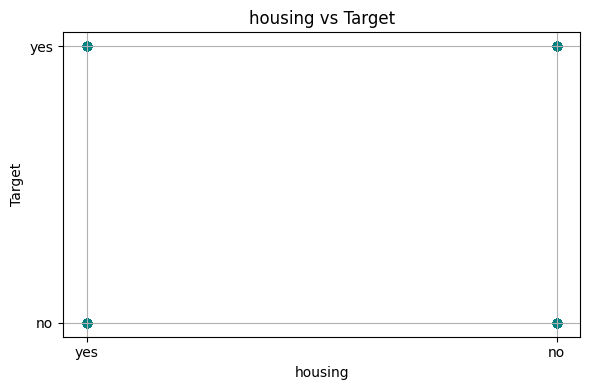

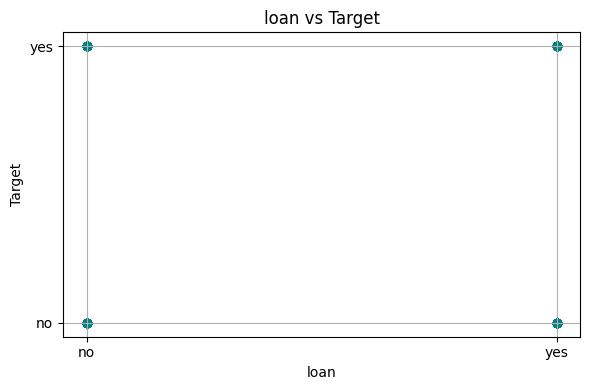

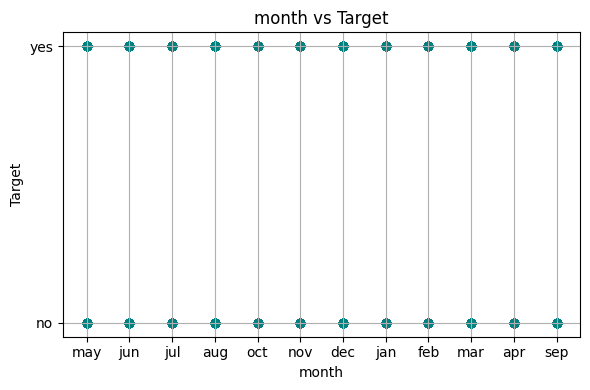

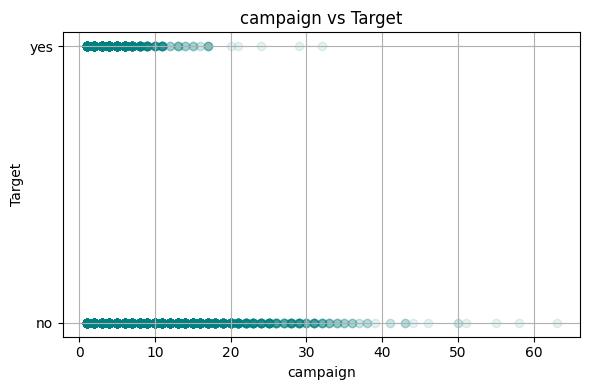

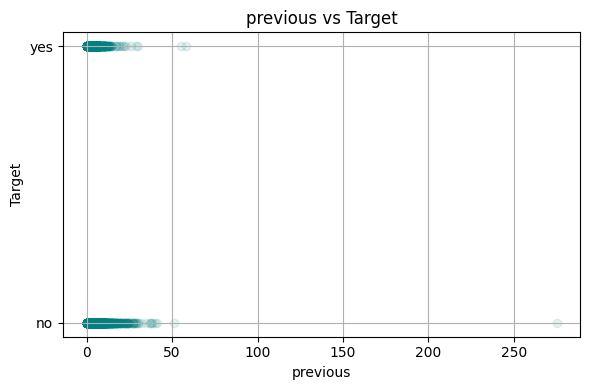

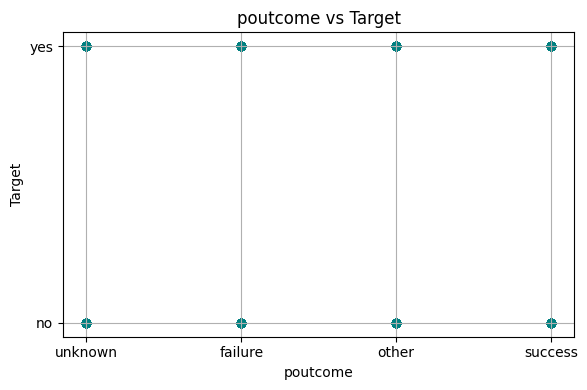

In [6]:
#DATA VISUALIZATION


for col in df_features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_features[col], df_target, alpha=0.1, color='teal')
    #use the id for yticks and the label for label on y axis
    plt.yticks(ticks=list(inverse_mapping.keys()),labels=[inverse_mapping[i] for i in inverse_mapping])

    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
#TRAINING THE MODEL


#using Random Forest Classifier and tuning it paramerters we got following best possible parameters
model = RandomForestClassifier(n_estimators=50, random_state=42)

model.fit(X_train, y_train)




RandomForestClassifier(n_estimators=50, random_state=42)

In [8]:
#EVALUATING MODEL

#making predictions on the test set
y_pred = model.predict(X_test)

#checking various metrics to evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8903018909653876
Confusion Matrix:
 [[7821  164]
 [ 828  230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.58      0.22      0.32      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



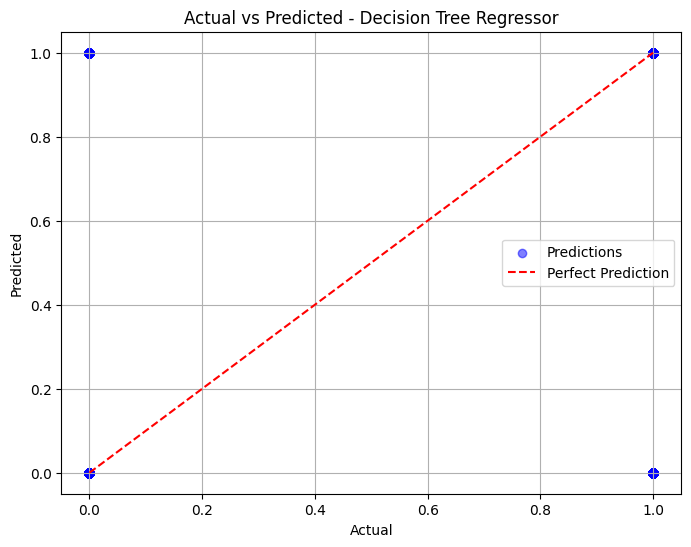

In [9]:
#DATA VISUALIZATION

# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predictions')

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')



# Labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Decision Tree Regressor")
plt.grid(True)
plt.legend()
plt.show()